In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from matplotlib.image import imread
import pathlib
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import losses

In [ ]:
import random
from matplotlib.image import imread
from os import listdir
import cv2


In [ ]:
import opendatasets as od
url = "https://www.kaggle.com/datasets/gpiosenka/100-bird-species"
data = od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ace991
Your Kaggle Key: ··········


100%|██████████| 1.96G/1.96G [00:23<00:00, 90.6MB/s]


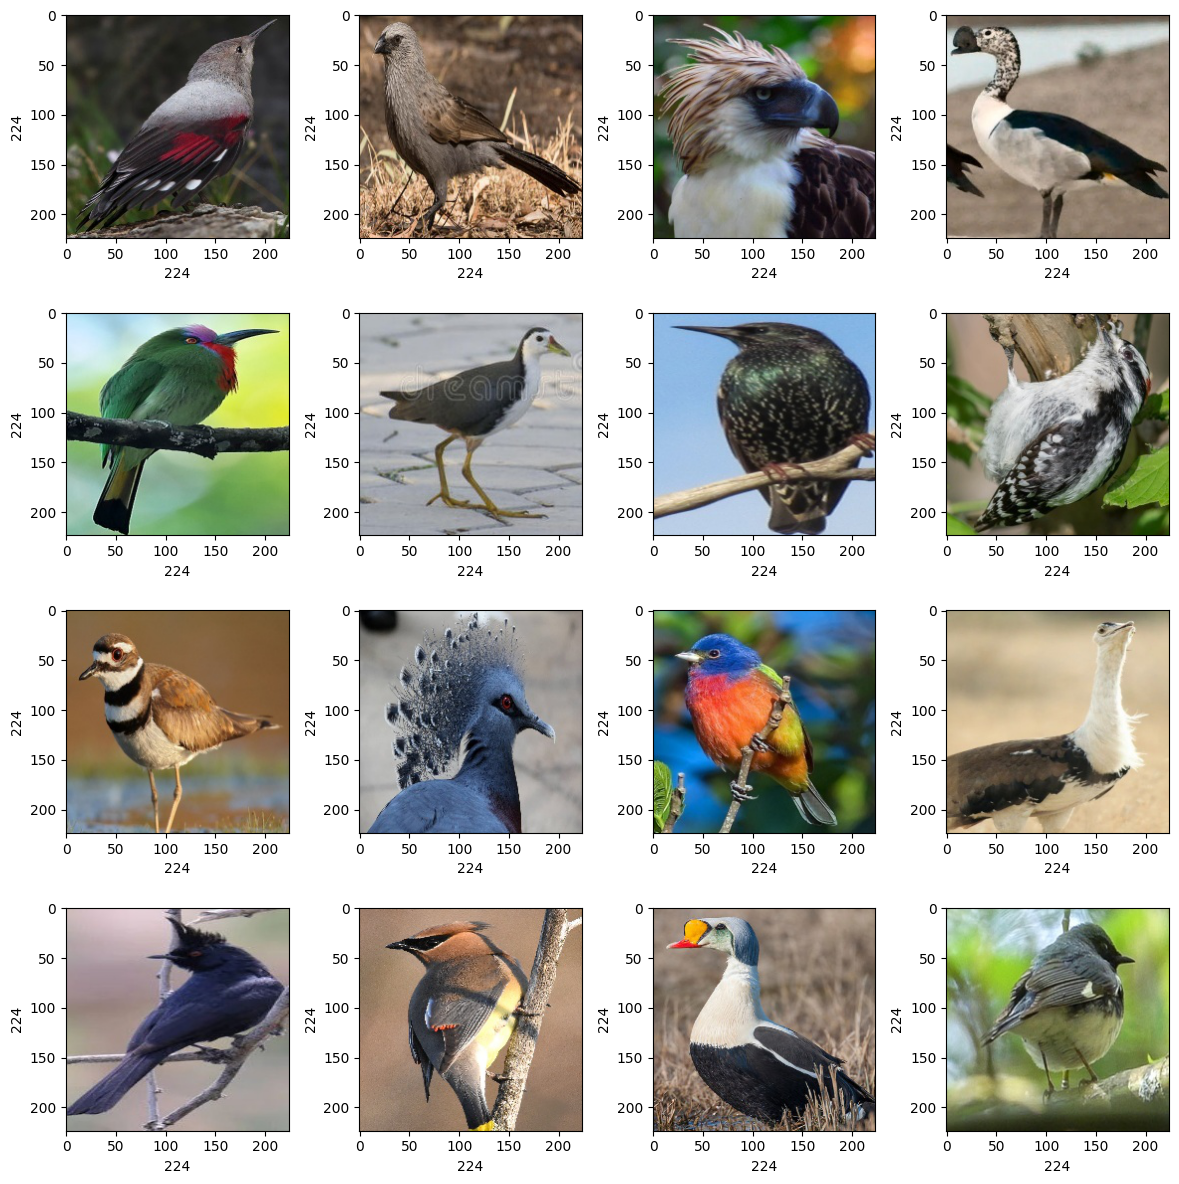

In [ ]:
plt.figure(figsize=(12, 12))
path = "/content/100-bird-species/train"

folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

num_folders = len(folders)
rows = 4
cols = 4

for i, folder in enumerate(folders):
    folder_path = os.path.join(path, folder)
    plt.subplot(rows, cols, i + 1)
    plt.tight_layout()
    rand_img = imread(os.path.join(folder_path, random.choice(os.listdir(folder_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)
    plt.ylabel(rand_img.shape[0], fontsize=10)

    if i + 1 == rows * cols:
        break

plt.show()


In [ ]:
batch_size = 64
img_height = 224
img_width = 224
train_dir = "/content/100-bird-species/train"
val_dir = "/content/100-bird-species/valid"
test_dir = "/content/100-bird-species/test"

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
  label_mode="categorical")

Found 84635 files belonging to 525 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
label_mode="categorical")

Found 2625 files belonging to 525 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
label_mode="categorical")

Found 2625 files belonging to 525 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 3)
(64, 525)


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip(),
  tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input,decode_predictions


In [ ]:
base_model = EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height,img_width,3)
)

43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(525)(x)
model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.0001

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [ ]:
initial_epochs = 10
training = model.fit(train_ds, epochs=initial_epochs, validation_data=val_ds)


Epoch 1/10
1323/1323 [==============================] - 337s 239ms/step - loss: 4.6758 - accuracy: 0.3184 - val_loss: 3.3710 - val_accuracy: 0.6114
Epoch 2/10
1323/1323 [==============================] - 315s 238ms/step - loss: 2.6588 - accuracy: 0.6487 - val_loss: 2.0271 - val_accuracy: 0.7684
Epoch 3/10
1323/1323 [==============================] - 307s 232ms/step - loss: 1.7981 - accuracy: 0.7399 - val_loss: 1.3953 - val_accuracy: 0.8331
Epoch 4/10
1323/1323 [==============================] - 309s 233ms/step - loss: 1.3837 - accuracy: 0.7824 - val_loss: 1.0576 - val_accuracy: 0.8686
Epoch 5/10
1323/1323 [==============================] - 308s 232ms/step - loss: 1.1420 - accuracy: 0.8069 - val_loss: 0.8543 - val_accuracy: 0.8872
Epoch 6/10
1323/1323 [==============================] - 311s 235ms/step - loss: 0.9885 - accuracy: 0.8225 - val_loss: 0.7229 - val_accuracy: 0.8949
Epoch 7/10
1323/1323 [==============================] - 311s 235ms/step - loss: 0.8774 - accuracy: 0.8369 - val_

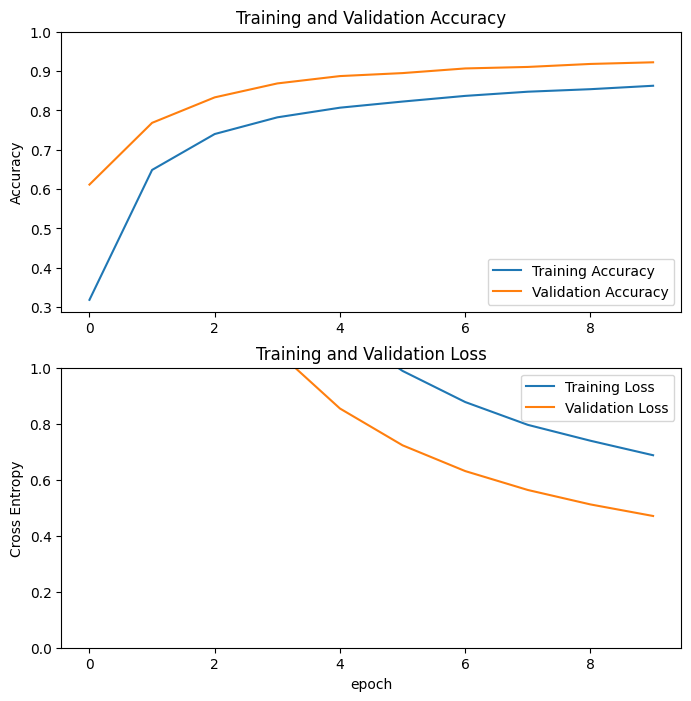

In [ ]:
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

loss = training.history['loss']
val_loss = training.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  385


In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
checkpoint_path = "efficientb3_{epoch:02d}.ckpt"
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,
    save_weights_only=True,
    save_freq=5*batch_size
)

In [ ]:
fine_tune_epochs = 5
total_epochs = initial_epochs + fine_tune_epochs

model.save_weights(checkpoint_path)

training_fine = model.fit(train_ds,
                          epochs=total_epochs,
                          initial_epoch=training.epoch[-1],
                          validation_data=val_ds,
                          callbacks=[checkpoint])

Epoch 10/15
 319/1323 [======>.......................] - ETA: 9:09 - loss: 0.4260 - accuracy: 0.8911

 639/1323 [=============>................] - ETA: 6:16 - loss: 0.3762 - accuracy: 0.9022

 959/1323 [====================>.........] - ETA: 3:20 - loss: 0.3528 - accuracy: 0.9084

1279/1323 [============================>.] - ETA: 24s - loss: 0.3335 - accuracy: 0.9135

1323/1323 [==============================] - 787s 559ms/step - loss: 0.3319 - accuracy: 0.9139 - val_loss: 0.1522 - val_accuracy: 0.9604
Epoch 11/15
 276/1323 [=====>........................] - ETA: 9:22 - loss: 0.2180 - accuracy: 0.9433

 596/1323 [============>.................] - ETA: 6:31 - loss: 0.2049 - accuracy: 0.9451

 916/1323 [===================>..........] - ETA: 3:39 - loss: 0.2026 - accuracy: 0.9464

1236/1323 [===========================>..] - ETA: 47s - loss: 0.1981 - accuracy: 0.9470

1323/1323 [==============================] - 727s 549ms/step - loss: 0.1971 - accuracy: 0.9473 - val_loss: 0.1239 - val_accuracy: 0.9699
Epoch 12/15
 233/1323 [====>.........................] - ETA: 9:51 - loss: 0.1570 - accuracy: 0.9569

 553/1323 [===========>..................] - ETA: 6:58 - loss: 0.1457 - accuracy: 0.9597

 873/1323 [==================>...........] - ETA: 4:04 - loss: 0.1437 - accuracy: 0.9603

1193/1323 [==========================>...] - ETA: 1:10 - loss: 0.1408 - accuracy: 0.9610

1323/1323 [==============================] - 729s 550ms/step - loss: 0.1405 - accuracy: 0.9614 - val_loss: 0.1040 - val_accuracy: 0.9695
Epoch 13/15
 190/1323 [===>..........................] - ETA: 10:15 - loss: 0.1146 - accuracy: 0.9678

 510/1323 [==========>...................] - ETA: 7:22 - loss: 0.1095 - accuracy: 0.9693

 830/1323 [=================>............] - ETA: 4:28 - loss: 0.1054 - accuracy: 0.9702

1150/1323 [=========================>....] - ETA: 1:34 - loss: 0.1032 - accuracy: 0.9708

1323/1323 [==============================] - 729s 551ms/step - loss: 0.1028 - accuracy: 0.9709 - val_loss: 0.1098 - val_accuracy: 0.9688
Epoch 14/15
 147/1323 [==>...........................] - ETA: 10:51 - loss: 0.0846 - accuracy: 0.9777

 467/1323 [=========>....................] - ETA: 7:53 - loss: 0.0805 - accuracy: 0.9771

 787/1323 [================>.............] - ETA: 4:56 - loss: 0.0809 - accuracy: 0.9766

1107/1323 [========================>.....] - ETA: 1:59 - loss: 0.0797 - accuracy: 0.9764

1323/1323 [==============================] - 741s 560ms/step - loss: 0.0790 - accuracy: 0.9766 - val_loss: 0.1160 - val_accuracy: 0.9688
Epoch 15/15
 104/1323 [=>............................] - ETA: 11:15 - loss: 0.0695 - accuracy: 0.9791

 424/1323 [========>.....................] - ETA: 8:17 - loss: 0.0654 - accuracy: 0.9795

 744/1323 [===============>..............] - ETA: 5:19 - loss: 0.0653 - accuracy: 0.9796

1064/1323 [=======================>......] - ETA: 2:22 - loss: 0.0642 - accuracy: 0.9804

1323/1323 [==============================] - 737s 556ms/step - loss: 0.0635 - accuracy: 0.9808 - val_loss: 0.1212 - val_accuracy: 0.9672


In [ ]:
acc += training_fine.history['accuracy']
val_acc += training_fine.history['val_accuracy']

loss += training_fine.history['loss']
val_loss += training_fine.history['val_loss']

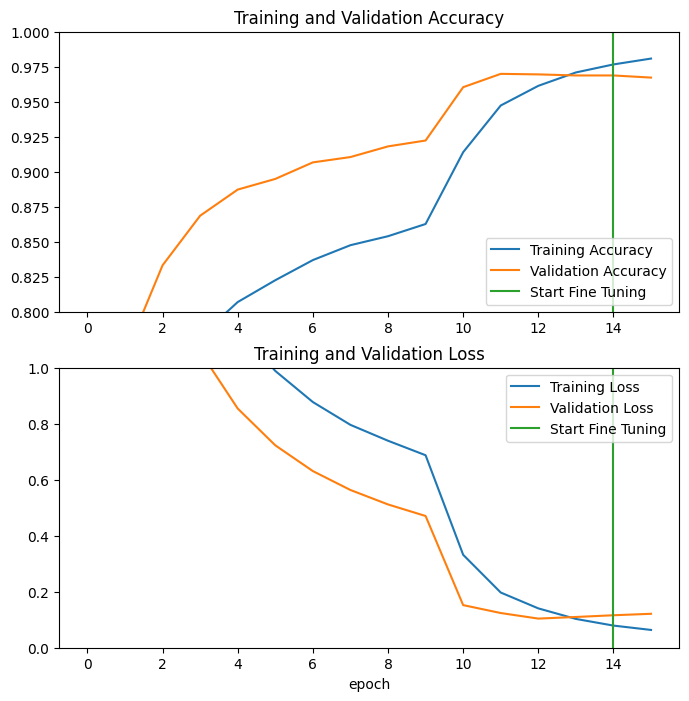

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([14,14],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([14,14],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

42/42 [==============================] - 10s 208ms/step - loss: 0.0630 - accuracy: 0.9829
Test accuracy : 0.9828571677207947


In [ ]:
latest = tf.train.latest_checkpoint('/content/')
latest

'/content/efficientb3_{epoch:02d}.ckpt'

In [33]:
model.load_weights(latest)

loss, acc = model.evaluate(test_ds)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

42/42 [==============================] - 9s 211ms/step - loss: 0.4084 - accuracy: 0.9451
Restored model, accuracy: 94.51%


In [42]:
for image, label in test_ds:
    predictions = model.predict(image)
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_names[np.argmax(score)]

    print('Predicted class:', predicted_class)
    print('------------------------')

2/2 [==============================] - 0s 125ms/step
Predicted class: FIERY MINIVET
------------------------
2/2 [==============================] - 0s 106ms/step
Predicted class: CINNAMON ATTILA
------------------------
2/2 [==============================] - 0s 86ms/step
Predicted class: PURPLE MARTIN
------------------------
2/2 [==============================] - 0s 94ms/step
Predicted class: CHUKAR PARTRIDGE
------------------------
2/2 [==============================] - 0s 102ms/step
Predicted class: BROWN THRASHER
------------------------
2/2 [==============================] - 0s 83ms/step
Predicted class: OVENBIRD
------------------------
2/2 [==============================] - 0s 98ms/step
Predicted class: RED FACED CORMORANT
------------------------
2/2 [==============================] - 0s 97ms/step
Predicted class: HORNED SUNGEM
------------------------
2/2 [==============================] - 0s 108ms/step
Predicted class: BLACK BREASTED PUFFBIRD
------------------------
2/2 [==